#6 class proposed 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_rows, img_cols = 224, 224 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

In [ ]:

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()  
valid_datagen = ImageDataGenerator()

train_generator1 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Train',
        classes = ['motorbike&airplan','flower&car','person&dog'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='categorical')

valid_generator1 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Validate',
        classes = ['motorbike&airplan','flower&car','person&dog'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='categorical')

train_generator21 = train_datagen.flow_from_directory(
       '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Train',
        classes = ['motorbike','airplane'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

valid_generator21 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Validate',
        classes = ['motorbike','airplane'], 
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

train_generator22 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Train',
        classes = ['flower','car'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

valid_generator22 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Validate',
        classes = ['flower','car'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

train_generator23 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Train',
        classes = ['person','dog'],
        target_size=(img_rows, img_cols),batch_size=16,class_mode='binary')

valid_generator23 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Validate',
        classes = ['person','dog'],
        target_size=(img_rows, img_cols),batch_size=16,class_mode='binary')

Found 2298 images belonging to 3 classes.
Found 1063 images belonging to 3 classes.
Found 766 images belonging to 2 classes.
Found 351 images belonging to 2 classes.
Found 766 images belonging to 2 classes.
Found 356 images belonging to 2 classes.
Found 766 images belonging to 2 classes.
Found 356 images belonging to 2 classes.


In [ ]:
base_model1 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model21 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model22 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model23 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model1.layers:   layer.trainable = False
for layer in base_model21.layers:   layer.trainable = False
for layer in base_model22.layers:   layer.trainable = False
for layer in base_model23.layers:   layer.trainable = False

In [ ]:
x = base_model1.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(3, activation ='softmax')(x)
model1 = tf.keras.models.Model(inputs=base_model1.input, outputs=preds)

x = base_model21.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)
model21 = tf.keras.models.Model(inputs=base_model21.input, outputs=preds)


x = base_model22.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)
model22 = tf.keras.models.Model(inputs=base_model22.input, outputs=preds)

x = base_model23.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)   # the only diff
model23 = tf.keras.models.Model(inputs=base_model23.input, outputs=preds)

In [ ]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model21.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model22.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model23.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cb1= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb2= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb3= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb4= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)


In [ ]:
history = model1.fit(
      train_generator1,
      steps_per_epoch=train_generator1.n//train_generator1.batch_size,
      epochs=25,
      validation_data=valid_generator1,callbacks=[cb1],
      validation_steps=25)

history = model21.fit(
      train_generator21,
      steps_per_epoch=train_generator21.n//train_generator21.batch_size,
      epochs=25,
      validation_data=valid_generator21,callbacks=[cb2],
      validation_steps=10)

history = model22.fit(
      train_generator22,
      steps_per_epoch=train_generator22.n//train_generator22.batch_size,
      epochs=25,
      validation_data=valid_generator22,callbacks=[cb3],
      validation_steps=10)

history = model23.fit(
      train_generator23,
      steps_per_epoch=train_generator23.n//train_generator23.batch_size,
      epochs=25,
      validation_data=valid_generator23,callbacks=[cb4],
      validation_steps=10)

Epoch 1/25
71/71 [==============================] - 651s 9s/step - loss: 0.2017 - accuracy: 0.9519 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 2/25
71/71 [==============================] - 52s 746ms/step - loss: 0.0152 - accuracy: 0.9974 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/25
71/71 [==============================] - 22s 309ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0016 - val_accuracy: 0.9987
Epoch 4/25
71/71 [==============================] - 15s 206ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0118 - val_accuracy: 0.9975
Epoch 5/25
71/71 [==============================] - 12s 174ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 6/25
71/71 [==============================] - 13s 180ms/step - loss: 1.5098e-05 - accuracy: 1.0000 - val_loss: 2.1854e-04 - val_accuracy: 1.0000
Epoch 7/25
71/71 [==============================] - 13s 186ms/step - loss: 5.5106e-06 - accuracy: 1.0000 - val_loss: 0.0045 - val_accura

In [ ]:
# model1.save ( '/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp/model1/' )
# model21.save( '/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp/model21/')
# model22.save( '/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp/model22/')
# model23.save( '/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp/model23/')

"""

"""

import tensorflow as tf
model1 =tf.keras.models.load_model('/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp/model1/' )
model21=tf.keras.models.load_model('/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp/model21/')
model22=tf.keras.models.load_model('/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp/model22/')
model23=tf.keras.models.load_model('/content/drive/My Drive/db/6C/Bipartite_Adam_pln_pp/model23/')


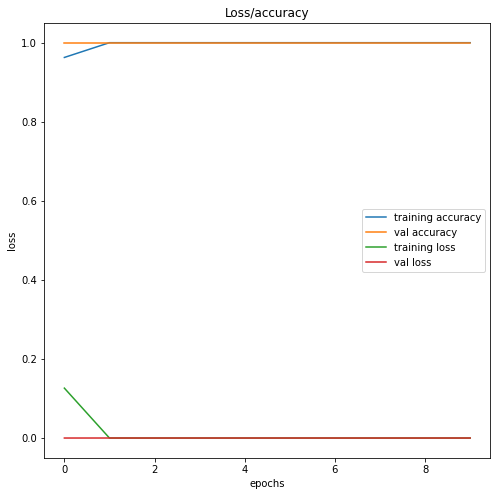

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import cv2
import os
import glob

In [ ]:
ct_person=0;ct_dog=0;ct_motorbike=0; ct_airplane=0; ct_car=0; ct_flower=0;

In [ ]:
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/motorbike/'
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)  # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
  images = np.vstack([x])
  classesb1 = model1.predict(images, batch_size=10)
  classesb21 = model21.predict(images, batch_size=10)
  #classesb22 = model22.predict(images, batch_size=10)
  # print('bikes:',classesb1[0][0],classesb21[0])
  if((classesb1[0][0] > .5) and (classesb21[0] < .5)):    ct_motorbike=ct_motorbike+1
print(ct_motorbike)

165


In [ ]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/airplane/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classess1 = model1.predict(images, batch_size=10)
  classess21 = model21.predict(images, batch_size=10)
  #classess22 = model22.predict(images, batch_size=10)
  # print('ships:',classess1[0][0],classess21[0])
  if((classess1[0][0] > .5) and (classess21[0] > .5)):    ct_airplane=ct_airplane+1
print(ct_airplane)

./
166


In [ ]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/car/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classest1 = model1.predict(images, batch_size=10)
  #classest21 = model21.predict(images, batch_size=10)
  classest22 = model22.predict(images, batch_size=10)
  # print('tracs:',classest1[0][1],classest22[0])
  if((classest1[0][1] > .5) and (classest22[0] > .5)):    ct_car=ct_car+1

./


In [ ]:
print(ct_car)

164


In [ ]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/flower/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw22 = model22.predict(images, batch_size=10)
  # print('wagons:',classesw1[0][1],classesw22[0])
  if((classesw1[0][1] > .5) and (classesw22[0] < .5)):    ct_flower=ct_flower+1
print(ct_flower)

./
wagons: 0.9999567 [8.627005e-34]
wagons: 0.9953053 [8.6468887e-23]
wagons: 0.99999475 [1.3500795e-37]
wagons: 0.9999846 [7.924458e-30]
wagons: 0.6999797 [1.7306759e-29]
wagons: 0.999801 [1.9373548e-30]
wagons: 0.9999901 [2.5926018e-33]
wagons: 0.9999974 [4.8509772e-33]
wagons: 0.9999417 [1.899508e-28]
wagons: 0.99997187 [8.742057e-35]
wagons: 0.97212344 [2.785618e-18]
wagons: 0.9999988 [0.]
wagons: 0.9903632 [7.0594985e-27]
wagons: 0.9999957 [1.005913e-34]
wagons: 0.998315 [4.0653534e-29]
wagons: 0.9998889 [1.0956597e-33]
wagons: 0.99999034 [1.81868e-36]
wagons: 0.9999591 [2.6774108e-33]
wagons: 0.2841296 [5.1193768e-17]
wagons: 0.99999964 [0.]
wagons: 0.9999292 [2.2239325e-25]
wagons: 0.99541014 [2.6948612e-18]
wagons: 0.99931645 [3.9294333e-24]
wagons: 0.9995751 [2.1524449e-17]
wagons: 0.99942434 [7.994086e-28]
wagons: 0.99702007 [1.698562e-21]
wagons: 0.99996626 [0.]
wagons: 0.9993229 [6.457309e-35]
wagons: 0.99999034 [0.]
wagons: 0.9998241 [7.0741876e-35]
wagons: 0.9999924 [0.]


In [ ]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/dog/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw23 = model23.predict(images, batch_size=10)
  #print('cats:',classesw1[0][2],classesw23[0])
  if((classesw1[0][2] > .5) and (classesw23[0] > .5)):    ct_dog=ct_dog+1
print(ct_dog)

./
139


In [ ]:
print('./')
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Colab Notebooks/Train Data For selected 2 project/natural_images/N/Test/chris_evans/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw23 = model23.predict(images, batch_size=10)
  print('person:',classesw1[0][2],classesw23[0])
  if((classesw1[0][2] > .5) and (classesw23[0] < .5)):    ct_person=ct_person+1
print(ct_person)

./
dogs: 1.0 [2.5919607e-13]
dogs: 1.0 [7.5794094e-05]
dogs: 1.0 [4.4588098e-09]
dogs: 1.0 [3.4044714e-08]
dogs: 1.0 [1.13581075e-10]
dogs: 1.0 [2.1086072e-10]
dogs: 1.0 [0.21105362]
dogs: 1.0 [1.0548226e-09]
dogs: 1.0 [2.8795673e-15]
dogs: 1.0 [1.1280889e-12]
dogs: 1.0 [5.596455e-05]
dogs: 1.0 [5.2798467e-14]
dogs: 0.00010424631 [0.99999356]
dogs: 0.0012218894 [0.00055785]
dogs: 1.0 [2.6977958e-12]
25


In [ ]:
ct_total=ct_motorbike+ct_airplane+ct_car+ct_flower+ct_person+ct_dog

In [ ]:
print('Total = ',ct_total)
print('Breakup = ',ct_person,ct_dog,ct_motorbike, ct_airplane, ct_car, ct_flower)  
print('accuracy=',ct_total/977) 

Total =  967
Breakup =  168 166 164 164 139 166
accuracy= 0.9897645854657113
